In [239]:
# =========================
# Imports
# =========================

import numpy as np
import matplotlib.pyplot as plt

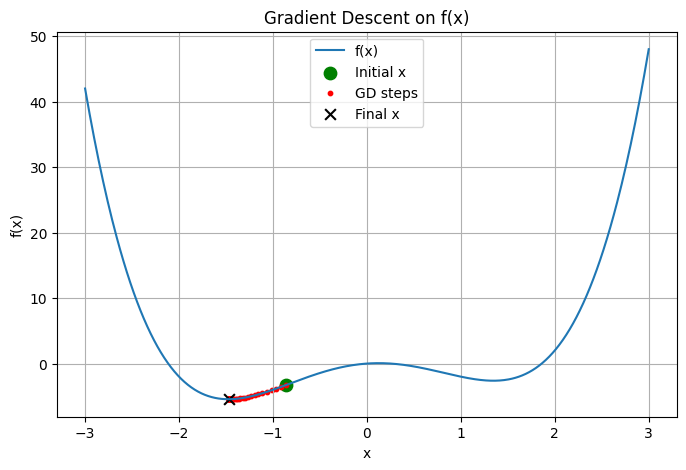

In [240]:
# =========================
# Function definitions
# =========================
def f(x):
    """
    Objective function.
    Can accept scalar or NumPy array.
    
    f(x) = x^4 - 4x^2 + x
    """
    return x**4 - 4*x**2 + x


def df(x):
    """
    Derivative of the objective function.
    Used for gradient-based optimization.
    
    df(x) = 4x^3 - 8x + 1
    """
    return 4*x**3 - 8*x + 1


# =========================
# Hyperparameters
# =========================
eta = 0.01        # Learning rate (step size for gradient descent)
n_iters = 100   # Number of optimization iterations


# =========================
# Initialization
# =========================
# Random initial point within the domain [-3, 3]
x = np.random.uniform(-3, 3)


# =========================
# Domain for plotting
# =========================
# Dense x-axis for smooth curve visualization
x_plot = np.linspace(-3, 3, 500)
y_plot = f(x_plot)


# =========================
# Optimization loop
# =========================
# Store trajectory if you want to visualize convergence later
x_history = []

for i in range(n_iters):
    # Save current point
    x_history.append(x)

    # Gradient descent update rule
    # x_{k+1} = x_k - eta * df(x_k)
    x = x - eta * df(x)


# =========================
# Visualization
# =========================
plt.figure(figsize=(8, 5))

# Plot the function curve
plt.plot(x_plot, y_plot, label="f(x)")

# Plot initial point explicitly
x_init = x_history[0]
plt.scatter(x_init, f(x_init), c="green", s=80, marker="o", label="Initial x")

# Plot optimization path
x_history = np.array(x_history)
plt.scatter(x_history, f(x_history), s=10, c="red", label="GD steps")

# Mark final solution
plt.scatter(x, f(x), c="black", s=60, marker="x", label="Final x")

plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gradient Descent on f(x)")
plt.legend()
plt.grid(True)

plt.show()


g(x,y)=x4+y4−4x2−4y2+x+y

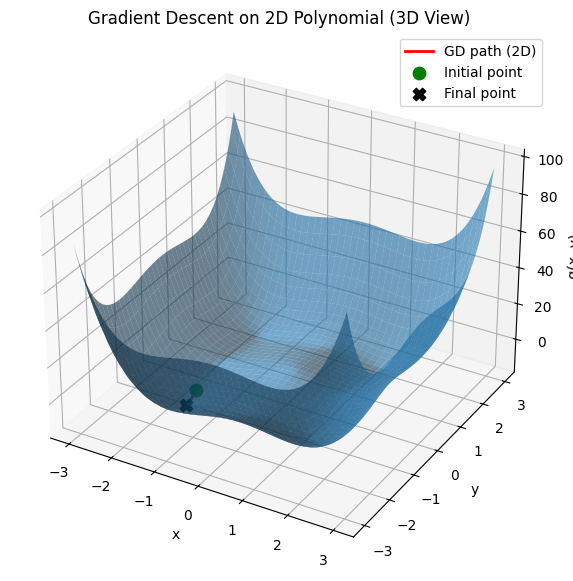

In [238]:
# =========================
# 3D POLYNOMIAL EXAMPLE
# =========================

from mpl_toolkits.mplot3d import Axes3D


# -------------------------
# Function definitions
# -------------------------
def g(x, y):
    """
    2D polynomial mapped to 3D surface.
    Accepts scalars or NumPy arrays.
    """
    return x**4 + y**4 - 4*x**2 - 4*y**2 + x + y


def grad_g(x, y):
    """
    Gradient of g(x, y).
    Returns partial derivatives (dg/dx, dg/dy).
    """
    dg_dx = 4*x**3 - 8*x + 1
    dg_dy = 4*y**3 - 8*y + 1
    return dg_dx, dg_dy


# -------------------------
# Hyperparameters
# -------------------------
eta_2d = 0.01
n_iters_2d = 800


# -------------------------
# Initialization
# -------------------------
x2 = np.random.uniform(-3, 3)
y2 = np.random.uniform(-3, 3)


# -------------------------
# Gradient descent loop
# -------------------------
x2_hist = []
y2_hist = []

for _ in range(n_iters_2d):
    x2_hist.append(x2)
    y2_hist.append(y2)

    gx, gy = grad_g(x2, y2)
    x2 = x2 - eta_2d * gx
    y2 = y2 - eta_2d * gy

x2_hist = np.array(x2_hist)
y2_hist = np.array(y2_hist)
z2_hist = g(x2_hist, y2_hist)


# -------------------------
# Surface grid for plotting
# -------------------------
x_surf = np.linspace(-3, 3, 120)
y_surf = np.linspace(-3, 3, 120)
X_surf, Y_surf = np.meshgrid(x_surf, y_surf)
Z_surf = g(X_surf, Y_surf)


# -------------------------
# 3D Visualization
# -------------------------
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection="3d")

# Surface
ax.plot_surface(
    X_surf, Y_surf, Z_surf,
    alpha=0.6,
    linewidth=0,
    antialiased=True
)

# Gradient descent trajectory
ax.plot(
    x2_hist,
    y2_hist,
    z2_hist,
    color="red",
    linewidth=2,
    label="GD path (2D)"
)

# Initial point
ax.scatter(
    x2_hist[0],
    y2_hist[0],
    z2_hist[0],
    color="green",
    s=80,
    marker="o",
    label="Initial point"
)

# Final point
ax.scatter(
    x2,
    y2,
    g(x2, y2),
    color="black",
    s=80,
    marker="X",
    label="Final point"
)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("g(x, y)")
ax.set_title("Gradient Descent on 2D Polynomial (3D View)")
ax.legend()

plt.show()
